In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



In [2]:
df=pd.read_csv('C:/Users/AMAN/Desktop/boston_house_prices.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\AMAN\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


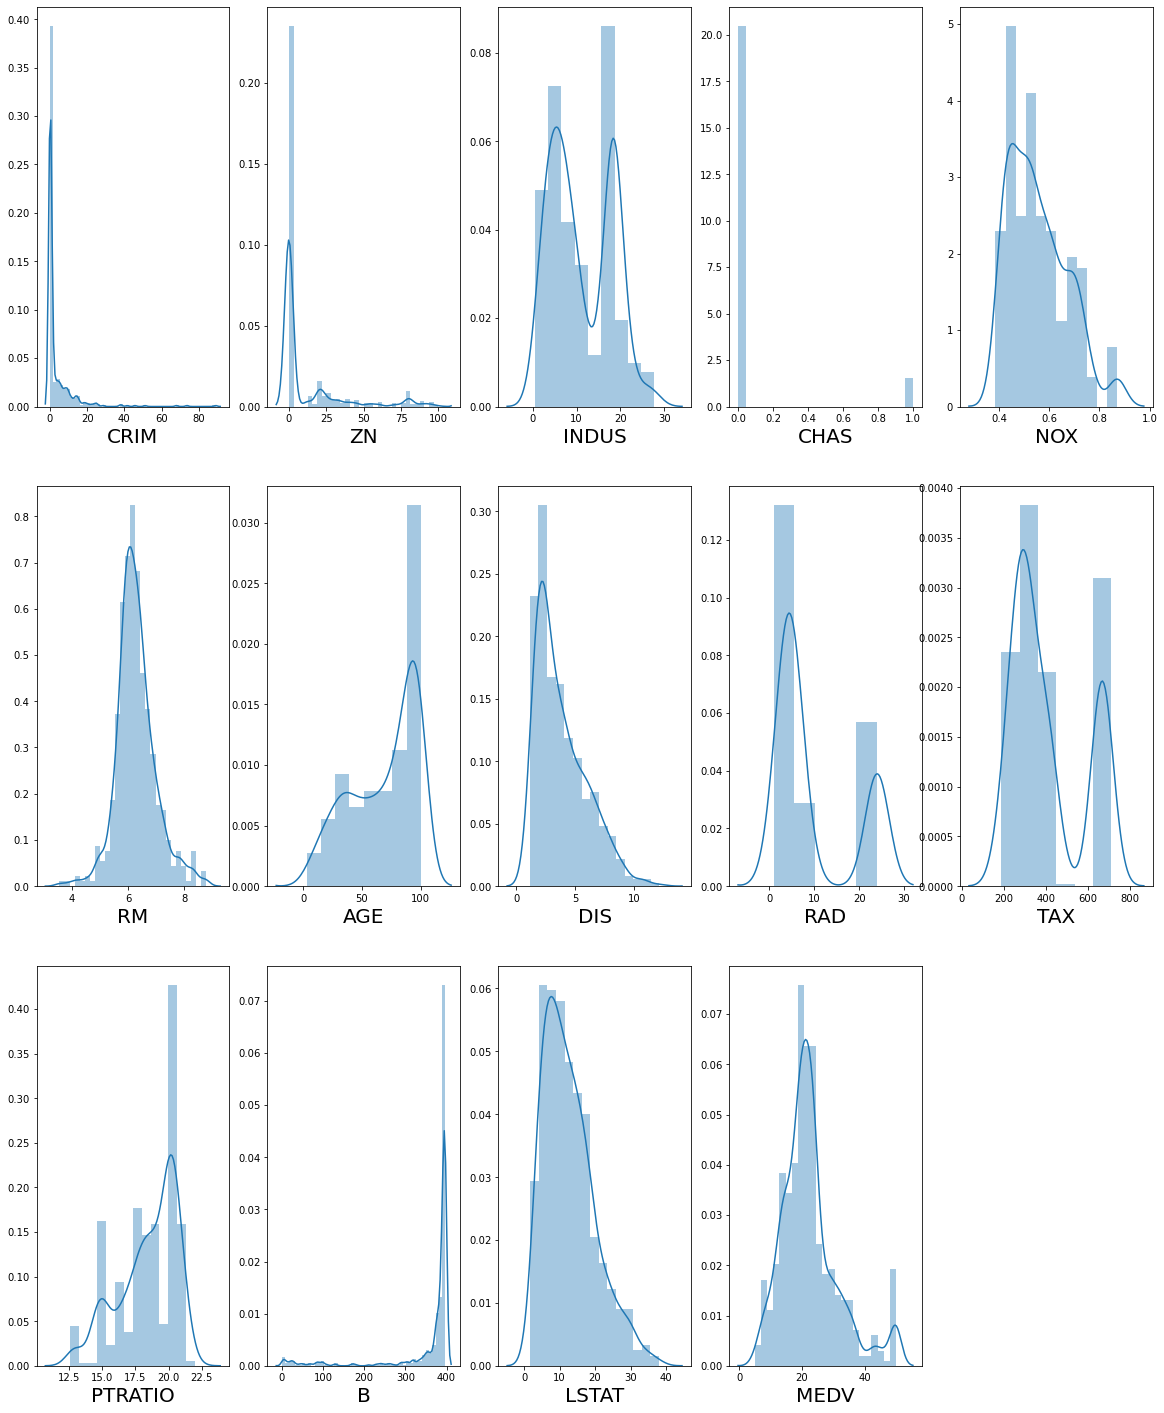

In [5]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=14:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()
          
        

In [6]:
norm=MinMaxScaler()
X_norm=norm.fit_transform(df)

In [7]:
df1=pd.DataFrame(X_norm,columns=df.columns)
df1


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [8]:
X=df1.iloc[:,:-1]
y=df1['MEDV']
       
y

0      0.422222
1      0.368889
2      0.660000
3      0.631111
4      0.693333
         ...   
501    0.386667
502    0.346667
503    0.420000
504    0.377778
505    0.153333
Name: MEDV, Length: 506, dtype: float64

In [66]:
scale=StandardScaler()
X_scale=scale.fit_transform(X)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=50)


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880
...,...,...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896,0.877036,0.183086
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502,0.853628,0.631847
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660,0.981032,0.589670
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344,0.936755,0.594610


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,1.331280e-16,2.161205e-16,6.450703e-17,4.519880e-17,-1.162882e-16,2.303822e-17,5.205542e-17,-9.884496e-17,-1.996646e-16,9.983231e-17
std,2.477697e+00,1.198379e+00,1.115830e+00,9.269699e-01,9.145868e-01,8.116089e-01,7.324044e-01,6.299854e-01,5.267748e-01,4.697594e-01
min,-4.854107e+00,-3.609629e+00,-2.770516e+00,-2.484909e+00,-2.649681e+00,-3.030640e+00,-1.438935e+00,-1.559109e+00,-1.193160e+00,-1.834316e+00
25%,-1.894366e+00,-7.642626e-01,-8.714432e-01,-4.511768e-01,-6.457577e-01,-5.447146e-01,-4.361275e-01,-4.613860e-01,-3.334540e-01,-3.084549e-01
50%,-3.868022e-01,-1.259016e-01,-8.136696e-02,-7.504346e-02,-1.070369e-01,4.302012e-02,-4.123184e-03,-3.451592e-02,-1.282332e-01,-8.173599e-03
75%,2.328566e+00,7.251502e-01,7.117844e-01,2.717563e-01,5.594907e-01,4.077344e-01,3.467015e-01,3.990541e-01,2.063554e-01,2.903479e-01
max,6.137412e+00,3.994449e+00,4.053252e+00,3.247809e+00,3.036147e+00,3.173136e+00,6.946216e+00,1.824053e+00,2.223946e+00,2.505137e+00


In [11]:
rlf=RandomForestRegressor()

In [12]:
rlf.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
y_pred=rlf.predict(x_train)

In [29]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9769293638501616
Adjusted R^2: 0.9760472512914913
MSE: 0.0008737406151914626
RMSE: 0.02955910376164106


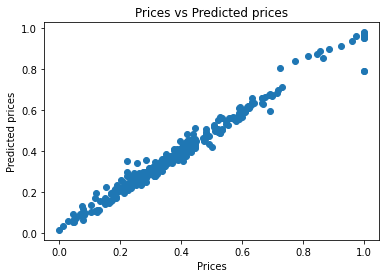

In [24]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


In [26]:
y_test_pred=rlf.predict(x_test)

In [28]:
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.813835926581873
Adjusted R^2: 0.7962987312598755
MSE: 0.009393942378167638
RMSE: 0.09692235231445653
